In [1]:
#importing basic libraries to perform array,graph functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpt

In [32]:
#importing Tensorflow and keras for deeplearning and CNN function
from tensorflow import keras
from keras.models import Model, Sequential
from tensorflow.keras.models import load_model

In [3]:
#importing Image processing functions
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator, img_to_array,array_to_img,load_img
from keras.utils.vis_utils import plot_model

In [30]:
#importing Inception V3 and keras applications
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.layers import Flatten, Dense, Dropout
from keras.layers.pooling import GlobalAveragePooling2D

In [35]:
#importing optimizers and model save functions
from keras.optimizers import Adam, SGD,RMSprop
import pickle

In [6]:
#importing Path selections and OS
import os
from pathlib import Path

In [7]:
#importing the Metrices and Results calculation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [8]:
#creating a cat_folder
Cat_folder  = []

for dirname, _, filenames in os.walk(r'C:\Users\darsh\anaconda3\envs\Cat Images'):
    for filename in filenames:
        Cat_folder.append (os.path.join(dirname, filename))

In [9]:
len(Cat_folder)

126607

In [10]:
Cat_folder

['C:\\Users\\darsh\\anaconda3\\envs\\Cat Images\\Abyssinian\\12136161_252.jpg',
 'C:\\Users\\darsh\\anaconda3\\envs\\Cat Images\\Abyssinian\\13743713_251.jpg',
 'C:\\Users\\darsh\\anaconda3\\envs\\Cat Images\\Abyssinian\\14092337_250.jpg',
 'C:\\Users\\darsh\\anaconda3\\envs\\Cat Images\\Abyssinian\\14210840_249.jpg',
 'C:\\Users\\darsh\\anaconda3\\envs\\Cat Images\\Abyssinian\\14475392_248.jpg',
 'C:\\Users\\darsh\\anaconda3\\envs\\Cat Images\\Abyssinian\\16485182_247.jpg',
 'C:\\Users\\darsh\\anaconda3\\envs\\Cat Images\\Abyssinian\\16734355_246.jpg',
 'C:\\Users\\darsh\\anaconda3\\envs\\Cat Images\\Abyssinian\\17041760_245.jpg',
 'C:\\Users\\darsh\\anaconda3\\envs\\Cat Images\\Abyssinian\\17060240_244.jpg',
 'C:\\Users\\darsh\\anaconda3\\envs\\Cat Images\\Abyssinian\\17361971_242.jpg',
 'C:\\Users\\darsh\\anaconda3\\envs\\Cat Images\\Abyssinian\\17361980_243.jpg',
 'C:\\Users\\darsh\\anaconda3\\envs\\Cat Images\\Abyssinian\\17704905_241.jpg',
 'C:\\Users\\darsh\\anaconda3\\envs\\Cat

In [11]:
#mentioning whichever cat breeds needed for classification
labels_needed= ['Bombay', 'Calico', 'Burmese', 'Himalayan',
'Munchkin', 'Ragdoll', 'Siberian', 'British Shorthair', 'Russian Blue', 'Dilute Calico']

In [12]:
#setting labels and images for a new folder
Cat_new   = []
labels = []

for image_file in Cat_folder:
    label = image_file.split(os.path.sep)[-2]
    if label in labels_needed:

        Cat_new.append(image_file)
        labels.append(label)

In [13]:
set(labels)

{'Bombay',
 'British Shorthair',
 'Burmese',
 'Calico',
 'Dilute Calico',
 'Himalayan',
 'Munchkin',
 'Ragdoll',
 'Russian Blue',
 'Siberian'}

In [14]:
len(Cat_new), len(labels)

(15654, 15654)

In [15]:
Cat_columns = pd.DataFrame( list (zip(Cat_new,labels)), columns=['Cat_new','labels'])
Cat_columns

,Cat_new,labels
0,C:\Users\darsh\anaconda3\envs\Cat Images\Bomba...,Bombay
1,C:\Users\darsh\anaconda3\envs\Cat Images\Bomba...,Bombay
2,C:\Users\darsh\anaconda3\envs\Cat Images\Bomba...,Bombay
3,C:\Users\darsh\anaconda3\envs\Cat Images\Bomba...,Bombay
4,C:\Users\darsh\anaconda3\envs\Cat Images\Bomba...,Bombay
...,...,...
15649,C:\Users\darsh\anaconda3\envs\Cat Images\Siber...,Siberian
15650,C:\Users\darsh\anaconda3\envs\Cat Images\Siber...,Siberian
15651,C:\Users\darsh\anaconda3\envs\Cat Images\Siber...,Siberian
15652,C:\Users\darsh\anaconda3\envs\Cat Images\Siber...,Siberian


In [16]:
#shuffling to view diffrent cat breed
from sklearn.utils import shuffle
df = (Cat_columns.sample(frac = 1).reset_index()).drop(columns = 'index')
df

,Cat_new,labels
0,C:\Users\darsh\anaconda3\envs\Cat Images\Calic...,Calico
1,C:\Users\darsh\anaconda3\envs\Cat Images\Bomba...,Bombay
2,C:\Users\darsh\anaconda3\envs\Cat Images\Ragdo...,Ragdoll
3,C:\Users\darsh\anaconda3\envs\Cat Images\Bomba...,Bombay
4,C:\Users\darsh\anaconda3\envs\Cat Images\Russi...,Russian Blue
...,...,...
15649,C:\Users\darsh\anaconda3\envs\Cat Images\Ragdo...,Ragdoll
15650,C:\Users\darsh\anaconda3\envs\Cat Images\Ragdo...,Ragdoll
15651,C:\Users\darsh\anaconda3\envs\Cat Images\Dilut...,Dilute Calico
15652,C:\Users\darsh\anaconda3\envs\Cat Images\Briti...,British Shorthair


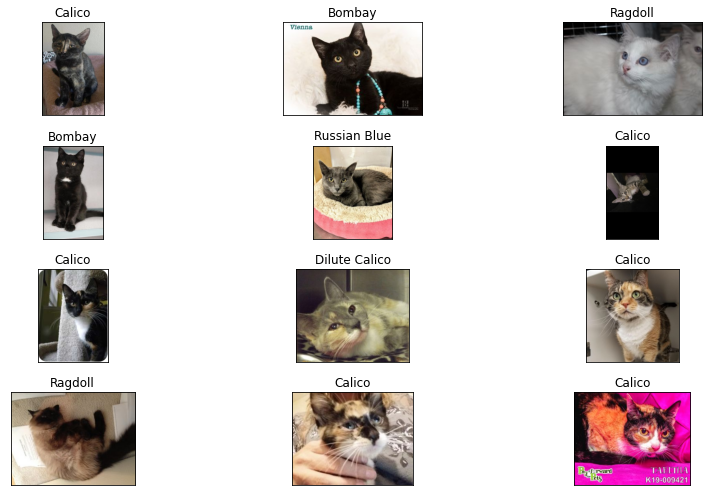

In [17]:
f,a = mpt.subplots(nrows=4, ncols=3,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(mpt.imread(df.Cat_new[i]))
    ax.set_title(df.labels[i])
    
mpt.tight_layout()
mpt.show()

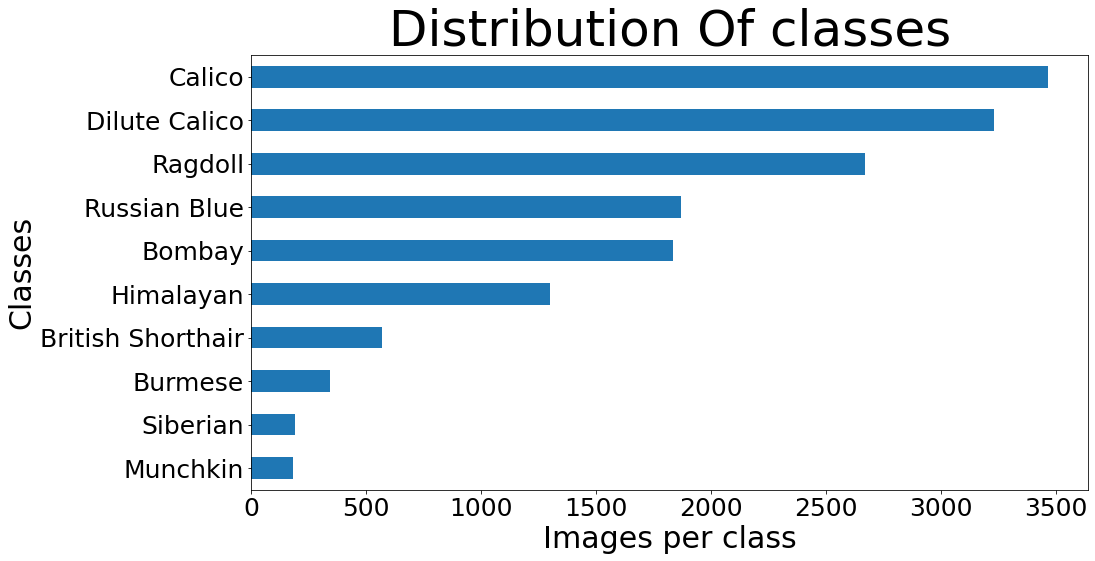

In [18]:
#a bar graph to visualize the diffrent breed
ax=pd.value_counts(df['labels'],ascending=True).plot(kind='barh',
                                                       fontsize="15",
                                                       title="Distribution Of classes",
                                                       figsize=(15,8))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
ax.title.set_size(50)
mpt.show()

In [19]:
df.labels.value_counts()

Calico               3468
Dilute Calico        3230
Ragdoll              2669
Russian Blue         1870
Bombay               1835
Himalayan            1301
British Shorthair     567
Burmese               344
Siberian              189
Munchkin              181
Name: labels, dtype: int64

In [20]:
#setting the train and test ratio to fit nto model
train_ratio = 0.75
test_ratio = 0.25
validation_ratio= 0.10
train, test = train_test_split(df, test_size = test_ratio )
val, test = train_test_split(test, test_size=test_ratio/(test_ratio + validation_ratio))

In [21]:
#rescaling images as per required output
img_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')

In [22]:
#assigning Train and test dataset
x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Cat_new', y_col='labels',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10)
x_val = img_datagen.flow_from_dataframe(dataframe = val,  x_col='Cat_new', y_col='labels',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10)
x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Cat_new', y_col='labels',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10)

Found 11740 validated image filenames belonging to 10 classes.
Found 1118 validated image filenames belonging to 10 classes.
Found 2796 validated image filenames belonging to 10 classes.


In [25]:
#fitting inception model
inception = InceptionV3(include_top=False,weights='imagenet',input_shape=(299,299,3))

In [26]:
for layer in inception.layers:
    layer.trainable = False
    
inception.summary() 

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [33]:
#fitting deeplearn model
model = Sequential()
model.add(inception)
model.add(GlobalAveragePooling2D())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 22,066,346
Trainable params: 263,562
Non-trainable params: 21,802,784
_________________________________________________________________


In [36]:
#Adding compiler to optimize the accuracy
model.compile(optimizer = SGD(),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [38]:
#Traing the model
Cat_test = model.fit(x_train, validation_data = x_val,steps_per_epoch = 175,validation_steps = 44,
                epochs = 10, verbose = 2)

Epoch 1/10
175/175 - 144s - loss: 1.0902 - accuracy: 0.6080 - val_loss: 1.0366 - val_accuracy: 0.6500
Epoch 2/10
175/175 - 142s - loss: 0.9861 - accuracy: 0.6457 - val_loss: 1.0870 - val_accuracy: 0.6545
Epoch 3/10
175/175 - 143s - loss: 1.0527 - accuracy: 0.6286 - val_loss: 1.0332 - val_accuracy: 0.6386
Epoch 4/10
175/175 - 141s - loss: 1.0065 - accuracy: 0.6371 - val_loss: 1.0510 - val_accuracy: 0.6614
Epoch 5/10
175/175 - 142s - loss: 1.0391 - accuracy: 0.6229 - val_loss: 1.1131 - val_accuracy: 0.6409
Epoch 6/10
175/175 - 143s - loss: 0.9958 - accuracy: 0.6440 - val_loss: 1.0269 - val_accuracy: 0.6068
Epoch 7/10
175/175 - 143s - loss: 0.9731 - accuracy: 0.6583 - val_loss: 1.0428 - val_accuracy: 0.6409
Epoch 8/10
175/175 - 142s - loss: 1.0108 - accuracy: 0.6440 - val_loss: 1.0499 - val_accuracy: 0.6386
Epoch 9/10
175/175 - 141s - loss: 1.0074 - accuracy: 0.6377 - val_loss: 0.9968 - val_accuracy: 0.6545
Epoch 10/10
175/175 - 141s - loss: 0.9290 - accuracy: 0.6669 - val_loss: 1.0800 - 

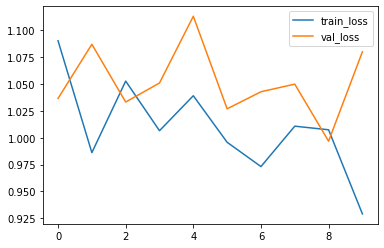

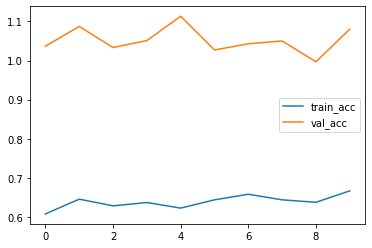

<Figure size 432x288 with 0 Axes>

In [40]:
#plotting a graph between accuracy and losses
mpt.plot(history.history['loss'],label='train_loss')
mpt.plot(history.history['val_loss'],label='val_loss')
mpt.legend()
mpt.show()
mpt.savefig('LossVal_loss')

mpt.plot(history.history['accuracy'],label='train_acc')
mpt.plot(history.history['val_loss'],label='val_acc')
mpt.legend()
mpt.show()
mpt.savefig('AccVal_acc')

In [41]:
#testing model prediction
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
predictions

array([5, 8, 4, ..., 4, 4, 0], dtype=int64)

In [42]:
labels = x_train.class_indices
labels

{'Bombay': 0,
 'British Shorthair': 1,
 'Burmese': 2,
 'Calico': 3,
 'Dilute Calico': 4,
 'Himalayan': 5,
 'Munchkin': 6,
 'Ragdoll': 7,
 'Russian Blue': 8,
 'Siberian': 9}

In [44]:
#replacing 0,1... with cat breeds
test["labels"].replace({"Bombay": 0,'British Shorthair': 1,
 'Burmese': 2,
 'Calico': 3,
 'Dilute Calico': 4,
 'Himalayan': 5,
 'Munchkin': 6,
 'Ragdoll': 7,
 'Russian Blue': 8,
 'Siberian': 9}, inplace = True)

In [45]:
#calcualting Test accuracy
test_accuracy = model.evaluate(x_test)[1] * 100
print('Test accuracy is : ',test_accuracy, '%' )

280/280 [==============================] - 178s 633ms/step - loss: 1.0735 - accuracy: 0.6102
Test accuracy is :  61.01573705673218 %


In [47]:
confusion_matrix(test.labels , predictions)

array([[211,   1,   5,   2,  17,   1,   0,   3,  69,   0],
       [  5,   4,   0,   1,  48,   1,   0,  10,  21,   0],
       [ 12,   0,  15,   1,  14,   3,   0,  18,  14,   0],
       [ 11,   0,   0, 193, 393,   0,   0,  26,  11,   0],
       [  3,   0,   0,  18, 480,   0,   1,  40,  48,   0],
       [  0,   0,   1,   0,  12, 126,   0, 103,   3,   0],
       [  1,   0,   0,   1,  20,   1,   0,   8,   3,   0],
       [  1,   0,   2,   7,  38,  41,   0, 347,   5,   0],
       [  1,   1,   1,   0,  24,   0,   0,   7, 305,   0],
       [  1,   0,   0,   1,  13,   0,   0,  21,   1,   0]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score, f1_score
print('F1 score is',f1_score(test.labels, predictions, average = 'weighted') *100, "%")

F1 score is 56.97799336079955 %


In [52]:
print("ROC- AUC score is", roc_auc_score( test.labels, predicted_probab, multi_class='ovr')*100)

ROC- AUC score is 89.46174082843032
